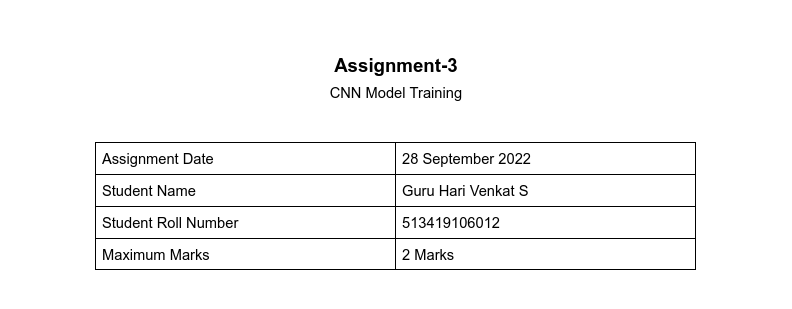

# CNN Model training

# Image Dataset



In [ ]:
!unzip 'drive/MyDrive/IBM assignments/Flowers-Dataset.zip'

### Import requirements

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
import numpy as np
from tensorflow.keras.preprocessing import image

# Image Augmentation

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
x_train = image_gen_train.flow_from_directory(batch_size=100,
                                                     directory='flowers',    
                                                     shuffle=True,
                                                     target_size=(64,64),
                                                     class_mode='categorical')

Found 4317 images belonging to 5 classes.


# Create Model

###  Add Layers Convolution, MaxPooling, Flatten, Dense Hidden Layers, Output

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(4,4), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(700,activation='relu'))
model.add(Dense(900,activation='relu'))
model.add(Dense(800,activation='relu'))
model.add(Dense(5,activation='softmax'))

# Compile The Model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# Fit The Model

In [ ]:
model.fit(x_train, steps_per_epoch=len(x_train), epochs=100)

Epoch 1/100
44/44 [==============================] - 14s 327ms/step - loss: 0.8491 - accuracy: 0.6729
Epoch 2/100
44/44 [==============================] - 14s 324ms/step - loss: 0.8388 - accuracy: 0.6729
Epoch 3/100
44/44 [==============================] - 14s 327ms/step - loss: 0.8766 - accuracy: 0.6627
Epoch 4/100
44/44 [==============================] - 14s 326ms/step - loss: 0.8553 - accuracy: 0.6690
Epoch 5/100
44/44 [==============================] - 14s 324ms/step - loss: 0.8148 - accuracy: 0.6859
Epoch 6/100
44/44 [==============================] - 14s 324ms/step - loss: 0.8194 - accuracy: 0.6857
Epoch 7/100
44/44 [==============================] - 15s 351ms/step - loss: 0.8133 - accuracy: 0.6871
Epoch 8/100
44/44 [==============================] - 14s 329ms/step - loss: 0.7986 - accuracy: 0.6938
Epoch 9/100
44/44 [==============================] - 14s 324ms/step - loss: 0.7976 - accuracy: 0.7009
Epoch 10/100
44/44 [==============================] - 14s 325ms/step - loss: 0.782

# Save The Model

In [ ]:
model.save('model2.h5')

# Test The Model

In [ ]:
image_path = f'/content/img_1.jpeg'
img = image.load_img(image_path,target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
print(op[pred])

1/1 [==============================] - 0s 15ms/step
sunflower
